## Loan Prediction

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('loan.csv')

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [61]:
df.isna().any()

Loan_ID               False
Gender                 True
Married                True
Dependents             True
Education             False
Self_Employed          True
Applicant_Income      False
Coapplicant_Income    False
Loan_Amount            True
Loan_Amount_Term       True
Credit_History         True
Property_Area         False
Loan_Status           False
dtype: bool

In [62]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

## Univariate Analysis

In [63]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [64]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

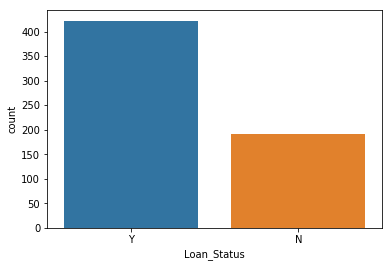

In [65]:
sns.countplot(x='Loan_Status', data=df)

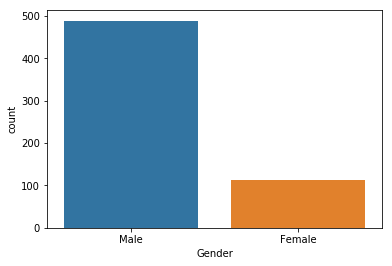

In [66]:
sns.countplot(x='Gender', data=df)

In [67]:
df.pivot_table(index='Loan_Status', columns='Gender', values='Loan_ID', aggfunc='count')

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


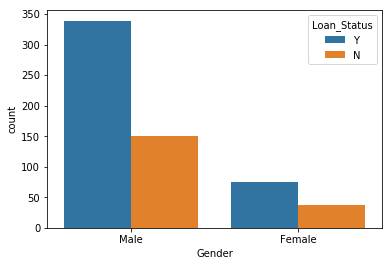

In [68]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

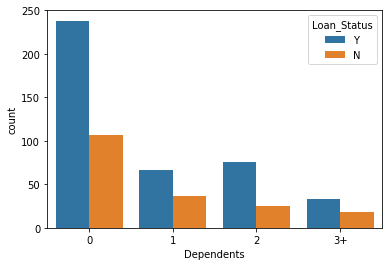

In [69]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [70]:
df.pivot_table(index='Loan_Status', columns='Dependents', values='Loan_ID', aggfunc='count')

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


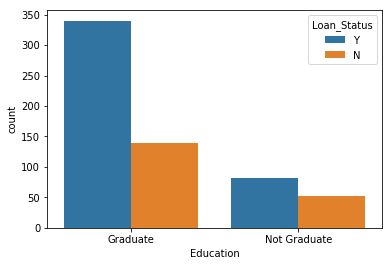

In [71]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

In [72]:
df.pivot_table(index='Loan_Status', columns='Education', values='Loan_ID', aggfunc='count')

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


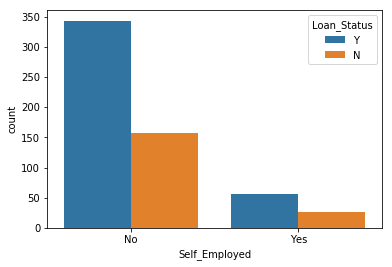

In [73]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

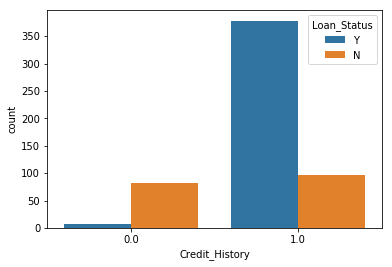

In [74]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

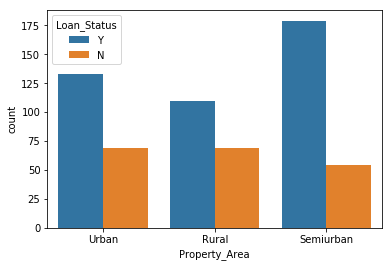

In [75]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

## Continous variables

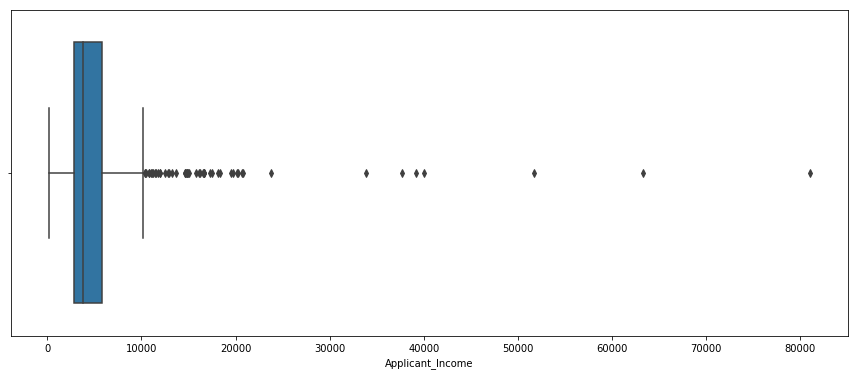

In [76]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='Applicant_Income', data=df)

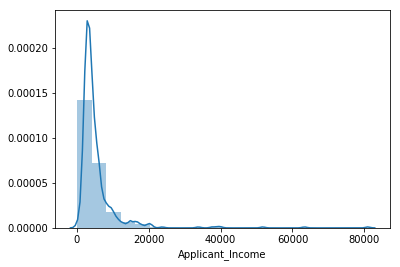

In [77]:
sns.distplot(df['Applicant_Income'], bins=20)

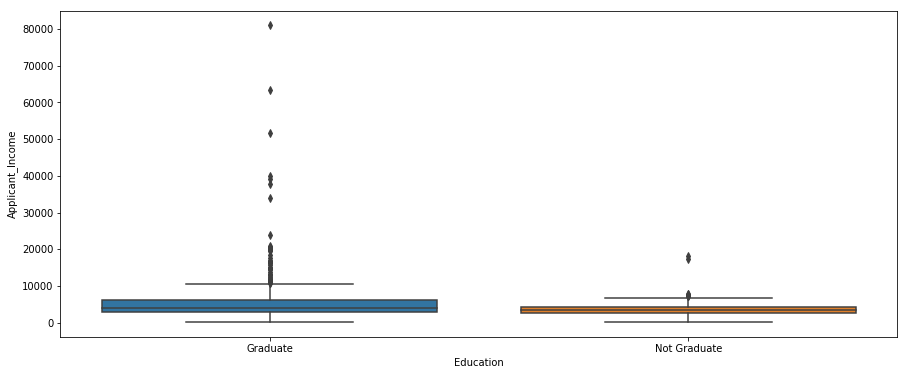

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='Education', y='Applicant_Income', data=df, ax=ax)

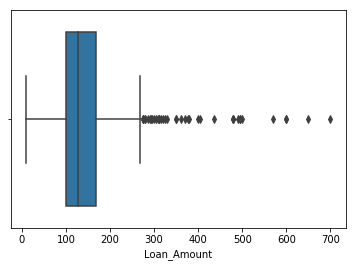

In [79]:
sns.boxplot(df['Loan_Amount'])

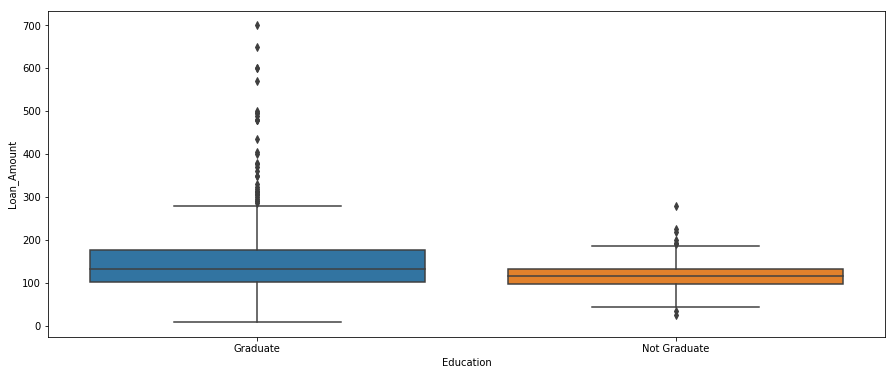

In [80]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='Education', y='Loan_Amount', data=df, ax=ax)

## Bivariate Analysis

  Loan_Status  Gender Married  Count
0           N  Female      No     29
1           N  Female     Yes      8
2           N    Male      No     49
3           N    Male     Yes    101
4           Y  Female      No     51
5           Y  Female     Yes     23
6           Y    Male      No     81
7           Y    Male     Yes    256


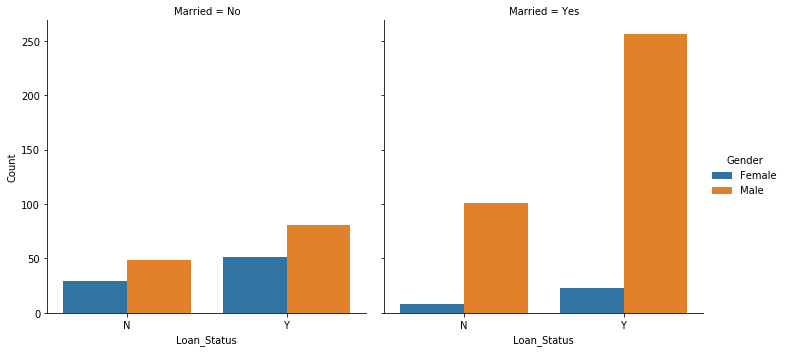

In [81]:
d = df.groupby(['Loan_Status', 'Gender', 'Married'], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x='Loan_Status', y='Count', hue='Gender', col='Married', data=d, kind='bar')

<class 'pandas.core.frame.DataFrame'>


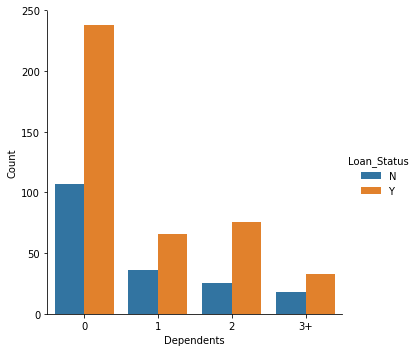

In [82]:
d = df.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
print(type(d))
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Dependents",y="Count", hue="Loan_Status", data=d, kind="bar")

In [83]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Income_Bin'] = pd.cut(df['Applicant_Income'],bins,labels=group)

In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


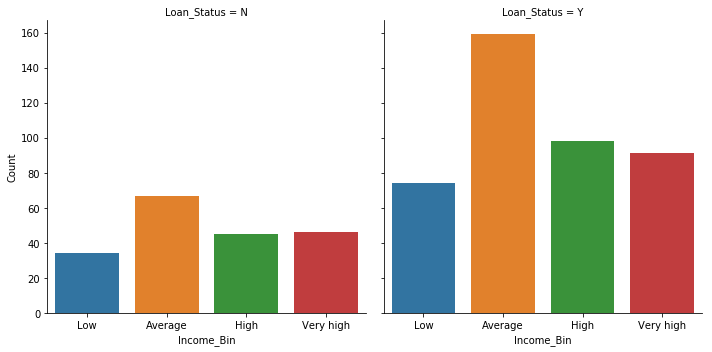

In [85]:
d = df.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", col="Loan_Status", data=d, kind="bar")

In [86]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_Bin']=pd.cut(df['Coapplicant_Income'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low      3
1           N                Average     61
2           N                   High     32
3           Y                    Low     19
4           Y                Average    161
5           Y                   High     65


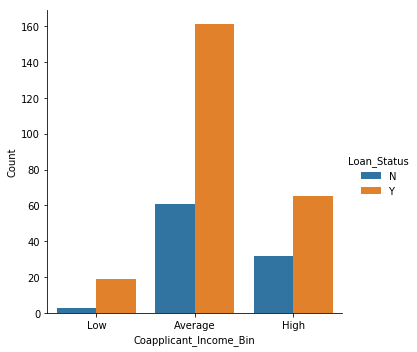

In [87]:
d = df.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [88]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_Bin']=pd.cut(df['Loan_Amount'],bins,labels=group)
#train['LoanAmount_Bin']= pd.qcut( train["Loan_Amount"],5)

  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


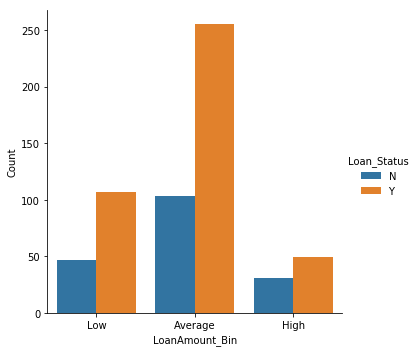

In [89]:
d = df.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

## Data Transformation

In [90]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [91]:
df.loc[df['Dependents'] == '3+', ['Dependents']] = 3

In [92]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [93]:
df['Loan_Status'].replace(to_replace=['N', 'Y'], value=[0,1], inplace=True)

In [94]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID                   614 non-null object
Gender                    601 non-null object
Married                   611 non-null object
Dependents                599 non-null object
Education                 614 non-null object
Self_Employed             582 non-null object
Applicant_Income          614 non-null int64
Coapplicant_Income        614 non-null float64
Loan_Amount               592 non-null float64
Loan_Amount_Term          600 non-null float64
Credit_History            564 non-null float64
Property_Area             614 non-null object
Loan_Status               614 non-null int64
Income_Bin                614 non-null category
Coapplicant_Income_Bin    341 non-null category
LoanAmount_Bin            592 non-null category
dtypes: category(3), float64(4), int64(2), object(7)
memory usage: 64.6+ KB


In [96]:
df['Loan_Status'] = df['Loan_Status'].apply(pd.to_numeric)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID                   614 non-null object
Gender                    601 non-null object
Married                   611 non-null object
Dependents                599 non-null object
Education                 614 non-null object
Self_Employed             582 non-null object
Applicant_Income          614 non-null int64
Coapplicant_Income        614 non-null float64
Loan_Amount               592 non-null float64
Loan_Amount_Term          600 non-null float64
Credit_History            564 non-null float64
Property_Area             614 non-null object
Loan_Status               614 non-null int64
Income_Bin                614 non-null category
Coapplicant_Income_Bin    341 non-null category
LoanAmount_Bin            592 non-null category
dtypes: category(3), float64(4), int64(2), object(7)
memory usage: 64.6+ KB


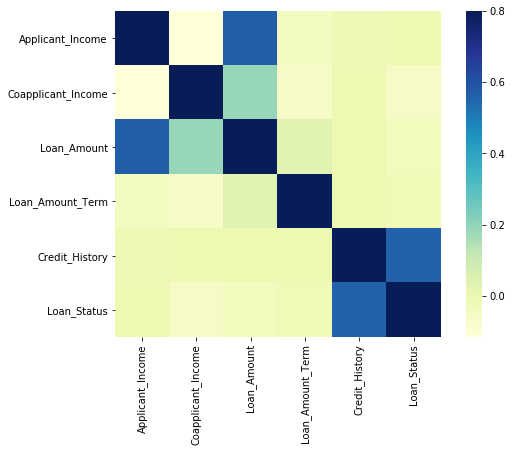

In [98]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu')

In [99]:
df = df.drop(['Income_Bin'], axis=1)

## Missing values and outliers treatment

In [100]:
df.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
Applicant_Income            0
Coapplicant_Income          0
Loan_Amount                22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Coapplicant_Income_Bin    273
LoanAmount_Bin             22
dtype: int64

In [101]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [102]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [103]:
gmean = df.loc[df['Education'] == 'Graduate', 'Loan_Amount'].mean()
ngmean = df.loc[df['Education'] == 'Not Graduate', 'Loan_Amount'].mean()
gmean,ngmean

(154.06021505376344, 118.40944881889764)

In [104]:
# Find out why this is not working
# df.loc[df['Education'] == 'Graduate', 'Loan_Amount'].fillna(gmean, inplace=True)
# df.loc[df['Education'] == 'Not Graduate', 'Loan_Amount'].fillna(ngmean, inplace=True)

In [105]:
df.loc[(df["Education"] == 'Graduate') & (df["Loan_Amount"].isna()) , 'Loan_Amount'] = gmean

In [106]:
df.loc[(df["Education"] == 'Not Graduate') & (df["Loan_Amount"].isna()) , 'Loan_Amount'] = ngmean

In [107]:
df.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
Applicant_Income            0
Coapplicant_Income          0
Loan_Amount                 0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Coapplicant_Income_Bin    273
LoanAmount_Bin             22
dtype: int64

In [108]:
df = df.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

In [109]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

In [110]:
X1 = X.copy()

In [111]:
X = pd.get_dummies(X)

In [112]:
X.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [113]:
X.shape, y.shape

((614, 10), (614,))

In [114]:
X_final = pd.concat([X,y], axis=1)

In [115]:
X_final.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [116]:
X_final.to_csv('loan_final.csv', index=False)